# Naive Bayes

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load direct and inverted indices
import sys
if '..' not in sys.path:
    sys.path.append('..')
from src.utils import LoadIndices, LoadDatasets

from sklearn.model_selection import StratifiedShuffleSplit

In [78]:
# Load datasets
an_jokes, bash_jokes = LoadDatasets()

# Load direct and inverted indices
an_direct, an_inverted, bash_direct, bash_inverted = LoadIndices()

In [65]:
# Vocablary size (number of different words). It will be used for Laplacian smoothing. Calculated for training set
def Vocablary(direct_index, idx):
    vocablary = set()
    for i in idx:
        vocablary |= set(direct_index[i])
    return vocablary

In [66]:
# Random choice of indices for train and test part
# Train and test samples indices
def TrainTestIdx(jokes, train_share = 0.75):
    #N = len(jokes)
    sss = StratifiedShuffleSplit(1, train_size = train_share)
    y = [joke[-1] for joke in jokes]
    return list(sss.split(np.zeros(len(jokes)), y))[0]

In [67]:
# Positive and negative word frequencies (number of use in good or bad jokes)
def word_freq(jokes, direct_index, idx):
    good_wf, bad_wf = {}, {}
    N_good = 0  # Total number of words in good jokes
    N_bad = 0  # Total number of words in bad jokes
    for i in idx:
        joke = direct_index[i]
        is_good = jokes[i][-1]
        if is_good:
            for word in joke:
                #good_wf[word] = good_wf.get(word, 0) + joke[word]
                #N_good += joke[word]
                good_wf[word] = good_wf.get(word, 0) + 1
                N_good += 1
        else:
            for word in joke:
                #bad_wf[word] = bad_wf.get(word, 0) + joke[word]
                #N_bad += joke[word]
                bad_wf[word] = bad_wf.get(word, 0) + 1
                N_bad += 1
    return good_wf, bad_wf, N_good, N_bad

In [68]:
def Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V):
    P_good = 0
    P_bad = 0
    for word in joke:
        # P(word | good)
        P_word_good = (good_freq.get(word, 0) + 1) / (N_words_good + V)
        # P(word | bad)
        P_word_bad = (bad_freq.get(word, 0) + 1) / (N_words_bad + V)
        
        #P_good += joke[word] * np.log(P_word_good)
        #P_bad  += joke[word] * np.log(P_word_bad)
        P_good += np.log(P_word_good)
        P_bad  += np.log(P_word_bad)
    LL = P_good - P_bad
    is_good = float(LL > 0)
    return is_good, LL, P_good, P_bad

## Anecdotes classification

Train set accuracy: 0.766


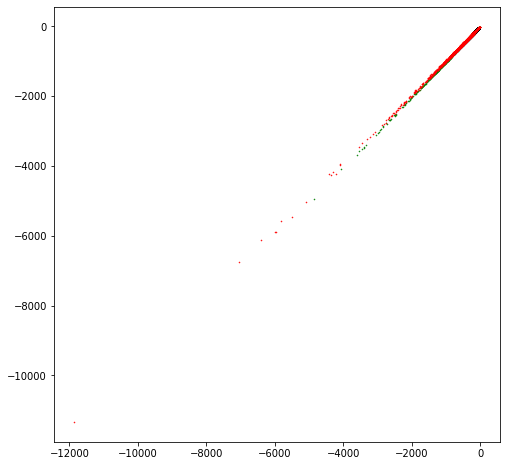

In [79]:
# Indices of jokes in train and test sets
train_idx, test_idx = TrainTestIdx(an_jokes, 0.75)

# Vocablary size
vocab = Vocablary(an_direct, train_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(an_jokes, an_direct, train_idx)

# Classification of train set jokes
accuracy = 0
Pgg, Pgb, Pbg, Pbb = [], [], [], []
for i in train_idx:
    joke = an_direct[i]
    is_good = an_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
    if is_good:
        Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
        Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
    else:
        Pbg.append(P_good)  # Probability of bad joke to be good according to NB
        Pbb.append(P_bad)  # Probability of bad jokes to be bad according to NB

accuracy /= len(train_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [80]:
# Test set accuracy
accuracy = 0
LLg, LLb = {}, {}
for i in test_idx:
    joke = an_direct[i]
    is_good = an_jokes[i][-1]
    is_good_nb, LLg[i], P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
accuracy /= len(test_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.610


## Bash quotes classification

Train set accuracy: 0.886


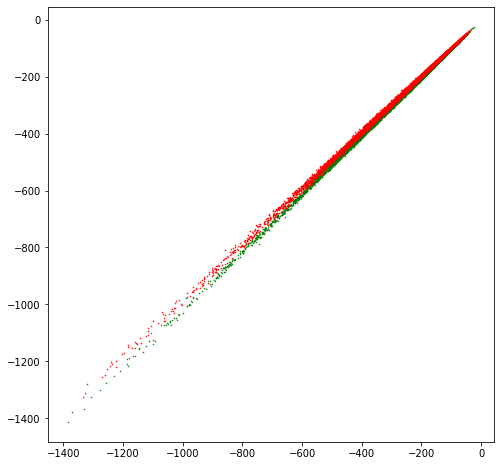

In [81]:
# Indices of jokes in train and test sets
train_idx, test_idx = TrainTestIdx(bash_jokes)

# Vocablary size
vocab = Vocablary(bash_direct, train_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(bash_jokes, bash_direct, train_idx)

# Classification of train set jokes
accuracy = 0
Pgg, Pgb, Pbg, Pbb = [], [], [], []
for i in train_idx:
    joke = bash_direct[i]
    is_good = bash_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
    if is_good:
        Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
        Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
    else:
        Pbg.append(P_good)  # Probability of bad joke to be good according to NB
        Pbb.append(P_bad)   # Probability of bad jokes to be bad according to NB
accuracy /= len(train_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [82]:
# Test set accuracy
accuracy = 0
for i in test_idx:
    joke = bash_direct[i]
    is_good = bash_jokes[i][-1]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += int(is_good_nb == is_good)
accuracy /= len(test_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.625


## Funny words rating

### Anecdotes

Good words

In [83]:
idx = range(len(an_direct))
vocab = Vocablary(an_direct, idx)
V = len(vocab)
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(an_jokes, an_direct, idx)

reg = 5

ff = []
for w in vocab:
    ng = good_freq.get(w, 0)
    nb = bad_freq.get(w, 0)
    ratio = (ng + reg) / (nb + reg)
    ff.append((w, ng, nb, ratio))
ff = pd.DataFrame(ff, columns = ['word', 'good count', 'bad count', 'ratio'])

ff = ff.sort_values(by = 'ratio', ascending = False).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,saloon,16,0,4.200000
1,suckme,16,0,4.200000
2,sultan,24,2,4.142857
3,veland88,28,3,4.125000
4,//vokrugsmeha.ru,23,2,4.000000
5,jonas,26,4,3.444444
6,дискотека,39,8,3.384615
7,задерживаться,15,1,3.333333
8,вокругсмеха.р,18,2,3.285714
9,озираться,18,2,3.285714


In [84]:
def ShowJokesWithWord(jokes, inverted_index, word, n = 5, good = True):
    for i in range(n):
        print(jokes[inverted_index[word][int(good)][i]])

ShowJokesWithWord(an_jokes, an_inverted, 'дискотека', 5)

['Легким движением руки дискотека превращается в ринг.', '2006-03-23', 253, 545, 356, 103, 1]
['зеленый, лысый и прыгает?... - солдат на дискотеке', '2001-02-13', 636, 1345, 922, 286, 1]
['Самые предусмотрительные девочки на дискотеке высматривают мальчиков,\nкоторые плохо танцуют...\n                                                               Veland88', '2007-09-01', 329, 557, 410, 81, 1]
['Вчера дискотека "Для тех, кому за 80" была сорвана группой пьяных\n70-летних подростков!!!', '2009-05-25', 414, 744, 538, 124, 1]
['Российские учёные выяснили, что на сельских дискотеках шансы забеременеть и умереть примерно равны.', '2012-06-05', 364, 548, 432, 68, 1]


Bad words

In [86]:
ff = ff.sort_values(by = 'ratio', ascending = True).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,алик,1,124,0.046512
1,-да,2,54,0.118644
2,-а,7,96,0.118812
3,бутаев,3,56,0.131148
4,-почему,0,32,0.135135
5,-ты,0,29,0.147059
6,лукаш,3,47,0.153846
7,-что,1,31,0.166667
8,-ну,4,47,0.173077
9,-нуть,1,28,0.181818


In [88]:
ShowJokesWithWord(an_jokes, an_inverted, 'зеленский', 5, good = False)

['Из выступления Порошенко: "Ты ещё Зеленский, чтоб страной руководить!"', '2019-05-07', -20, 32, 6, 26, 0]
['Вот у Януковича был золотой унитаз.\nА у Зеленского Лохо Трон.', '2019-10-31', -25, 39, 7, 32, 0]
['Видимо, пора г-ну Зеленскому разучивать новую роль. Последняя ( лох ) не очень удалась.', '2019-10-29', -33, 51, 9, 42, 0]
['Зеленский зассал первый раз на анализах, а второй раз - когда не пришел на дебаты.', '2019-04-15', -39, 55, 8, 47, 0]
['Зеленский потребовал от всех кандидатов президенты Украины проити обследование на обрезание.  Тимошенко и Парашенко напряглись.', '2019-04-08', -21, 49, 14, 35, 0]


### Bash quotes

Good words

In [89]:
idx = range(len(bash_jokes))
vocab = Vocablary(bash_direct, idx)
V = len(vocab)
good_freq, bad_freq, N_words_good, N_words_bad = word_freq(bash_jokes, bash_direct, idx)

reg = 5

ff = []
for w in vocab:
    ng = good_freq.get(w, 0)
    nb = bad_freq.get(w, 0)
    ratio = (ng + reg) / (nb + reg)
    ff.append((w, ng, nb, ratio))
ff = pd.DataFrame(ff, columns = ['word', 'good count', 'bad count', 'ratio'])

ff = ff.sort_values(by = 'ratio', ascending = False).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,заебать,36,5,4.100000
1,кивать,19,1,4.000000
2,мамин,22,2,3.857143
3,учительница,28,4,3.666667
4,извиниться,17,1,3.666667
5,дпс,16,1,3.500000
6,командировка,33,6,3.454545
7,наклоняться,12,0,3.400000
8,стук,15,1,3.333333
9,бодро,11,0,3.200000


In [91]:
ShowJokesWithWord(bash_jokes, bash_inverted, 'ржач', 5, good = True)

['<Verderben> как меня на ржач пробивало на инженерке при фразе "раствор циркуля"', '2006-05-29 14:04', 1148911440, 21045, 2757, 1]
['yyy: Максим. \nyyy: В постели должен стоять член! \nyyy: А у нас в постели стоит один только ржач!', '2010-12-09 08:11', 1291882260, 408881, 22868, 1]
['ear: Препод, дедок лет 70:\n- Четыре года замужем? И детей еще нет? Чего же вы, простите, резину тянете?\nИ дикий ржач со стороны его ровесников-преподов.', '2011-03-07 08:12', 1299485520, 409860, 20788, 1]
['Limbo: я сегодня читала башорг на работе и маскировала ржач за кашлем\nLimbo: в итоге мне сказали, что болезнь на ногах переносить нельзя, и отправили домой ', '2007-05-01 11:33', 1178019180, 196037, 5134, 1]
['gr33n> Поцоны\ngr33n> Не учите английский\ngr33n> Я недавно с ужасом осознал, что начал понимать, о чём говорят в порно\ngr33n> И теперь меня пробивает на ржач', '2012-08-10 09:45', 1344591900, 418355, 13096, 1]


Bad words

In [92]:
ff = ff.sort_values(by = 'ratio', ascending = True).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,java,0,33,0.131579
1,релиз,0,24,0.172414
2,убунту,2,32,0.189189
3,генту,0,20,0.200000
4,софт,5,42,0.212766
5,to,8,51,0.232143
6,консоль,2,24,0.241379
7,код,33,151,0.243590
8,линукс,20,96,0.247525
9,исходник,2,23,0.250000


In [93]:
ShowJokesWithWord(bash_jokes, bash_inverted, 'генту', 5, good = False)

['Новая поговорка от линуксоидов: Собрал Генту, да не ту.', '2012-01-30 09:46', 1327916760, 415356, 1642, 0]
['xxx: Имеется дохлый БП, паяльник и Генту\nxxx: Зимние каникулы будут весёлыми.', '2013-09-07 09:13', 1378545180, 424347, 1036, 0]
['<Serj> net-wireless/bluez required by world\n<Ion> блюз нужен миру!\n<Ion> я хренею с вашей генты.', '2009-04-23 08:45', 1240476300, 403222, 777, 0]
['<pinocchio> привет кто-нибудь устанавливал Linux Mandriva 2006?\n<Alexey> генту ролит\n<pinocchio> блин так и знал', '2006-01-30 10:30', 1138617000, 9572, 1515, 0]
['magenta: Когда домой?\ndel: 10-го\nmagenta: Собираешься? )\ndel: я ж не генту, сегодня только 3 число', '2010-07-05 08:45', 1278319500, 407210, 3498, 0]
